# Tarea 4

Se importan las librerias necesarias y se cargan los datos del archivo "interferometria.rad"

In [317]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.stats import sigma_clip

In [318]:
data = np.genfromtxt('interferometria.rad', comments='*', dtype='str')

In [319]:
Temp  = np.array(data[:,9:], dtype='float')
Hrs   = np.array(data[:,0], dtype='str')
Coord = np.array(data[:,1:3],dtype='float')

# Pasamos a radianes
Coord[:,0] = Coord[:,0]*np.pi/180
Coord[:,1]= Coord[:,1]*np.pi/180

Promediamos los canales:

In [320]:
Temp_mean = np.zeros(len(Temp))

for i in range(len(Temp_mean)):
    Temp_mean[i] = np.mean(Temp[i,:])
    
# creamos pandas

data = pd.DataFrame()
data['hrs']     = Hrs 
data['coord_a'] = Coord[:,0]
data['coord_e'] = Coord[:,1]
data['temp']    = Temp_mean

Graficamos

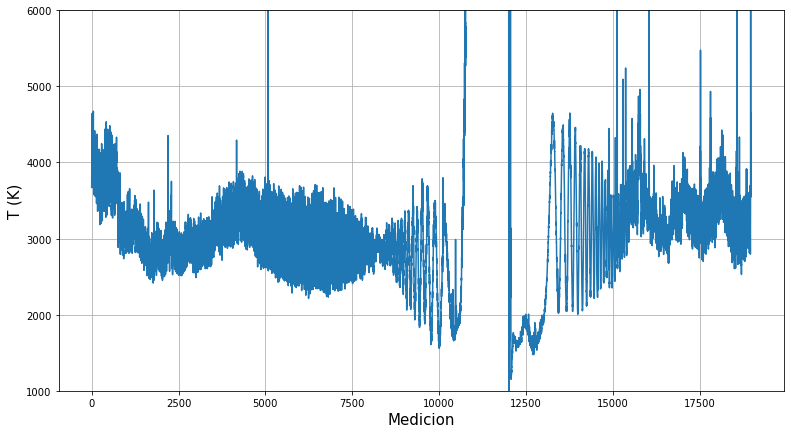

In [321]:
plt.figure(figsize=(13,7))
plt.plot(np.array(data.index), data['temp'])
plt.ylim(1000,6000)
plt.xlabel('Medicion', size=15)
plt.ylabel('T (K)', size=15)
plt.grid()
plt.show()

Separamos los datos de mañana y tarde:

In [395]:
data_m = data[11497:].reset_index()
data_t = data[:11497].reset_index()

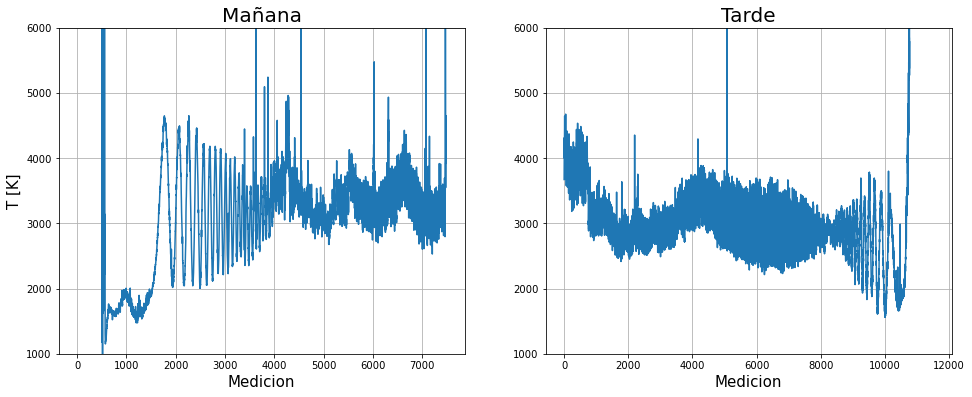

In [396]:
# SIN FILTRAR
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].set_ylim(1000,6000)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

Por inspeccion se puede notar que los datos que corresponden a muy temprano al amanecer y muy tarde al atardecer tienen ruido, por lo que se eliminan los datos

In [397]:
data_m = data_m[2000:]
data_t = data_t[:10000]

Luego, todos los datos que esten alejados mas de 0.5 veces el RMS del RMS se filtran

In [398]:
rms_m = np.sqrt(np.mean(data_m['temp']**2))
rms_t = np.sqrt(np.mean(data_t['temp']**2))

data_m = data_m[abs(data_m['temp']-rms_m)<=0.5*rms_m]
data_t = data_t[abs(data_t['temp']-rms_t)<=0.5*rms_t]

Se obtienen las temperaturas para la mañana y tarde ya filtradas

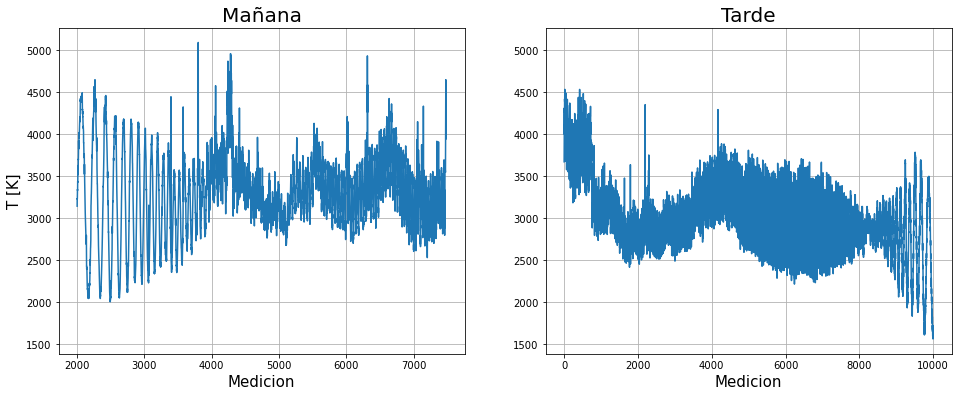

In [401]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))

# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

A continuacion se filtran las frecuencias del espectro en el espacio de Fourier.

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


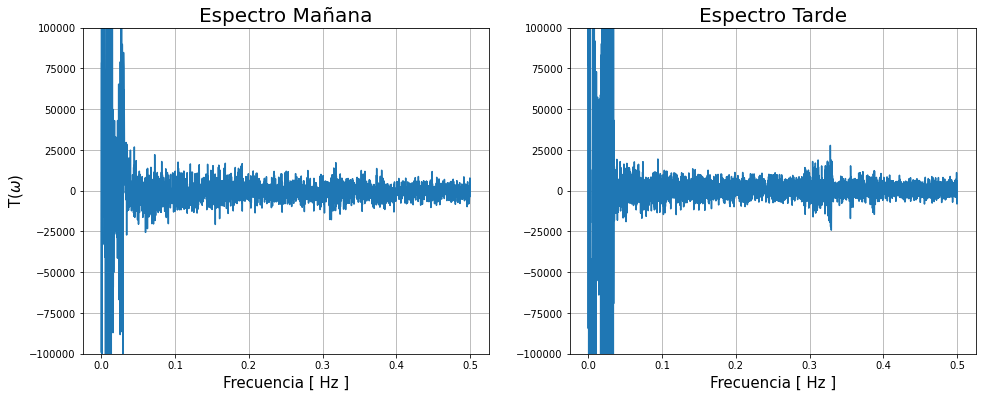

In [405]:
#mañana
esp_m=np.fft.rfft(data_m['temp'])
f_m=np.fft.rfftfreq(len(data_m.index))

#tarde
esp_t=np.fft.rfft(data_t['temp'])
f_t=np.fft.rfftfreq(len(data_t.index))

fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Espectro Mañana', size=20)
ax[0].plot(f_m,esp_m)
ax[0].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[0].set_ylabel('T($\omega$)', size=15)
ax[0].set_ylim(-100000,100000)
ax[0].grid()

# grafico tarde
ax[1].set_title('Espectro Tarde', size=20)
ax[1].plot(f_t,esp_t)
ax[1].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

In [406]:
# Eliminamos frecuencias bajas y altas
for i in range(len(f_t)):
    if f_t[i]<0.01:
        esp_t[i] = 0
    if f_t[i]>0.4:
        esp_t[i] = 0
        
for i in range(len(f_m)):
    if f_m[i]<0.01:
        esp_m[i] = 0
    if f_m[i]>0.4:
        esp_m[i] = 0

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


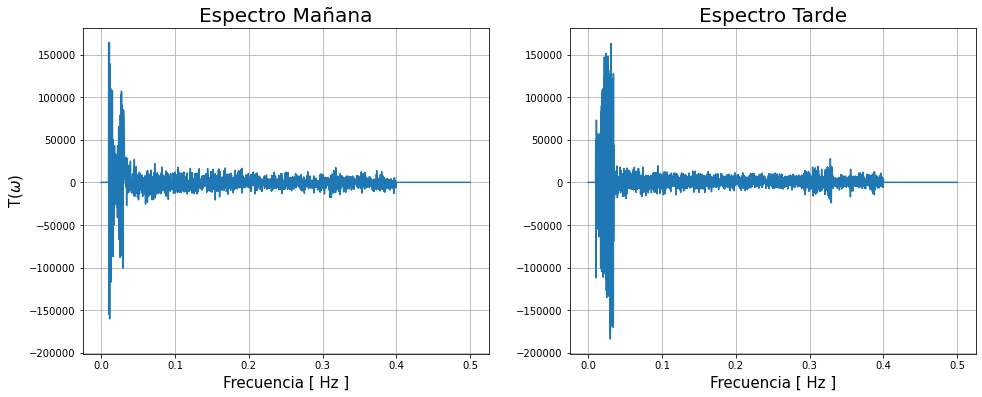

In [407]:
# Se filtra por RMS (no estoy seguro siii)
"""
rms_m = np.sqrt(np.mean(esp_m**2))
rms_t = np.sqrt(np.mean(esp_t**2))

for i in range(len(f_m)):
    if abs(float(esp_m[i]))>=abs(5*rms_m):
        esp_m[i] = 0
        
for i in range(len(f_t)):
    if abs(float(esp_t[i]))>=abs(5*rms_t):
        esp_t[i] = 0
"""
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Espectro Mañana', size=20)
ax[0].plot(f_m,esp_m)
ax[0].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[0].set_ylabel('T($\omega$)', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Espectro Tarde', size=20)
ax[1].plot(f_t,esp_t)
ax[1].set_xlabel('Frecuencia [ Hz ]', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)

Se vuelve al espacio de temperaturas con la anti-transformada

In [408]:
data_m['temp'] = np.fft.irfft(esp_m)
data_t = data_t[1:] # asi calzan los indices 
data_t['temp'] = np.fft.irfft(esp_t)

Se grafican las temperaturas:

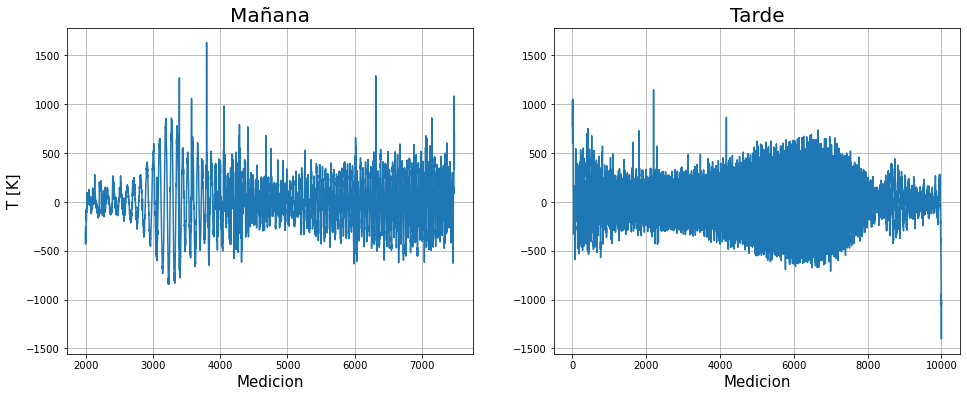

In [409]:
fig, ax = plt.subplots(1, 2, sharey=True, figsize=(16,6))
# grafico mañana
ax[0].set_title('Mañana', size=20)
ax[0].plot(np.array(data_m.index),data_m['temp'])
ax[0].set_xlabel('Medicion', size=15)
ax[0].set_ylabel('T [K]', size=15)
ax[0].grid()

# grafico tarde
ax[1].set_title('Tarde', size=20)
ax[1].plot(np.array(data_t.index),data_t['temp'])
ax[1].set_xlabel('Medicion', size=15)
ax[1].grid()
ax[1].tick_params(labelleft=True)